In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

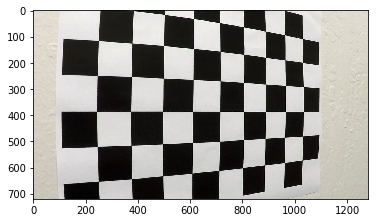

In [2]:
# load calibration images
calib_imgs = []
for img in glob.glob('./camera_cal/*.jpg'):
    image = mpimg.imread(img)
    calib_imgs.append(image)

plt.imshow(calib_imgs[1])
plt.show()

In [3]:
# chessboard size
pattern = (9, 6)

# arrays to store object points and image points from all the images
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
objp = np.zeros((pattern[0] * pattern[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:pattern[0],0:pattern[1]].T.reshape(-1,2)

In [4]:
# step through the list and search for chessboard corners
calibration_imgs = []
for img in calib_imgs:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # find the chess board corners
    ret, corners = cv2.findChessboardCorners(img, pattern, None)
    # if found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # draw and display the corners
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        cv2.drawChessboardCorners(img, pattern, corners, ret)
        calibration_imgs.append(img)

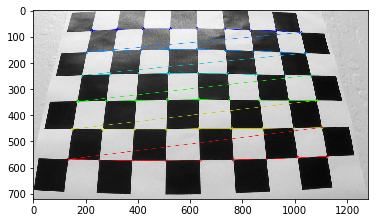

In [5]:
# display found corners
plt.imshow(calibration_imgs[6])
plt.show()

In [6]:
# get calibration parameters
shape = calib_imgs[0].shape[0:2]

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, shape[::-1], None, None)

print(mtx)

[[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


In [7]:
# save calibration prameters for later use
import pickle

coeffs_pkl = {'mtx': mtx,
              'dist': dist}

pickle.dump(coeffs_pkl, open('coeffs.p', 'wb'))

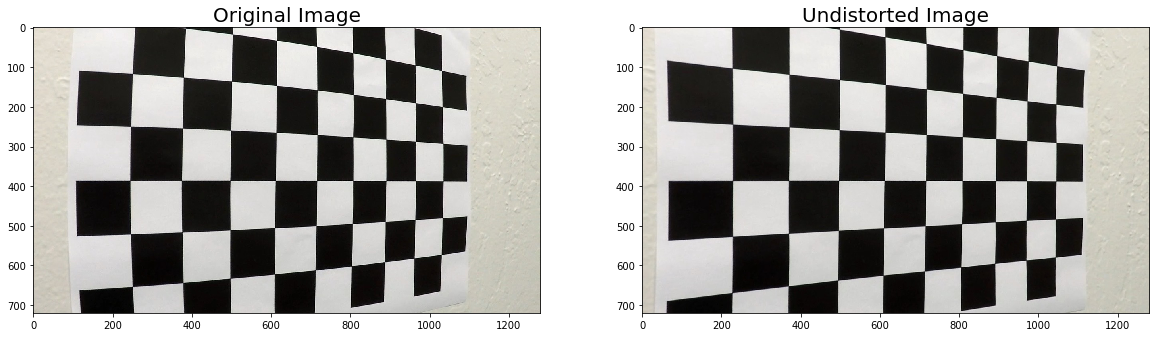

In [8]:
# try to undistort image
img = calib_imgs[1]
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=20)
plt.show()